# Unsupervised Model: Clustering


## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
# training df 
df_train = pd.read_csv('../../data/train/customer_churn_dataset-training-clean.csv')
#test df 
df_test = pd.read_csv('../../data/test/customer_churn_dataset-testing-clean.csv')

## Splitting Train and Test

In [3]:
# training data setting fitting variables and predictor
X_train = df_train[['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction']]
y_train = df_train['churn']

# test data setting fitting variables and predictor
X_test = df_test[['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction']]
y_test = df_test['churn']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353644, 10)
(151562, 10)
(353644,)
(151562,)


## MinMax Scale

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)

# Kmeans model fit

In [4]:
from sklearn.cluster import KMeans

In [25]:
k=2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
pred = kmeans.fit_predict(X_train_scaled)
X_train['churn'] = kmeans.labels_

## best kmean

In [26]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_train_scaled)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [27]:
df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
df_kmeans

,inertia
0,505381.197650
1,399191.745612
2,346471.177921
3,311211.020857
4,288487.020150
5,271753.854006
6,258146.180706
7,245517.781439
8,239063.393230


In [10]:
import matplotlib.pyplot as plt

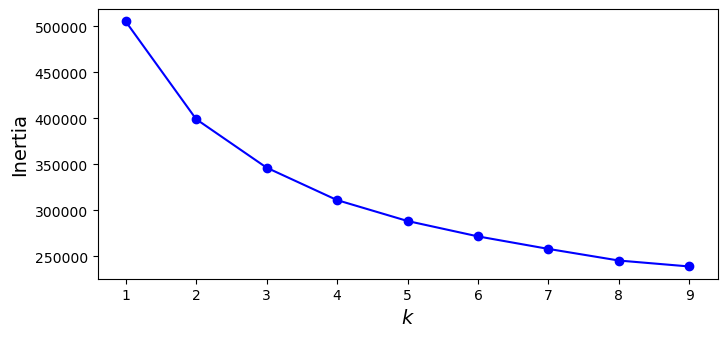

In [28]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [29]:
# best Kmean K=3 

k=4
best_kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
best_kmeans.fit(X_train_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [36]:
pred2 = best_kmeans.predict(X_train_scaled)
X_train['churn'] = kmeans.labels_

## silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_scaled, kmeans.labels_)

## cluster distribution kmean_labels --> churn

Text(0.5, 1.0, 'Cluster Distribution')

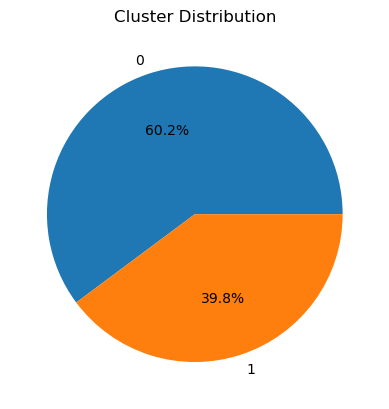

In [38]:
cluster_count = X_train['churn'].value_counts()
plt.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%')
plt.title('Cluster Distribution')

**CAREFUL**
seems to be LABELLING churn 0 and no-churn as 1, contrary to denotations in actual train and test data

## Actual churn distribution in entire X_train

Text(0.5, 1.0, 'Cluster Distribution')

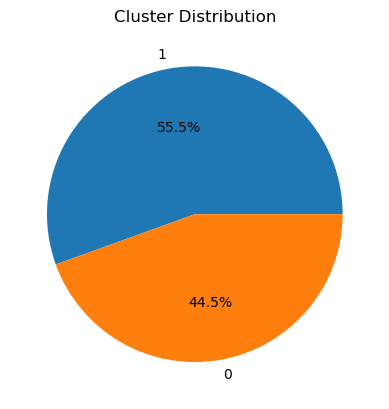

In [34]:
actual_churn_count = df_train['churn'].value_counts()
plt.pie(actual_churn_count, labels=actual_churn_count.index, autopct='%1.1f%%')
plt.title('Cluster Distribution')

In [39]:
import pickle

# Save the best model
with open('../../models/trained_model_06_KMeans.pkl', 'wb') as f:
    pickle.dump(best_kmeans, f)